# Importar Librerias

In [1]:
import pandas as pd
import numpy as np

# Leer Datos

In [2]:
df = pd.read_pickle('base.pkl')

In [3]:
print(df)

{'flow': array([1.72378057e+00, 9.60881602e-01, 1.00000000e-03, ...,
       3.55681843e+00, 3.40213266e+00, 1.81279569e+00]), 'obs_tas': array([[-10.60000038,  -9.69999981,  -6.69999981, ...,  -8.10000038,
         -6.5       ,  -5.4000001 ],
       [-20.5       , -19.10000038, -12.        , ..., -15.5       ,
        -11.80000019,  -9.10000038],
       [-23.60000038, -22.5       , -15.10000038, ..., -19.39999962,
        -14.60000038, -12.19999981],
       ...,
       [-11.89999962, -11.39999962,  -8.39999962, ...,  -9.30000019,
         -7.19999981,  -6.30000019],
       [ -7.        ,  -6.5       ,  -3.4000001 , ...,  -5.        ,
         -3.79999995,  -3.        ],
       [ -2.4000001 ,  -2.0999999 ,   1.29999995, ...,  -0.89999998,
          0.5       ,   1.10000002]]), 'flow_dates': 1958-01-04   1958-01-04
1958-01-05   1958-01-05
1958-01-06   1958-01-06
1958-01-07   1958-01-07
1958-01-08   1958-01-08
                ...    
2016-12-22   2016-12-22
2016-12-23   2016-12-23
2016-12

# Genera un dataframe con los datos

In [4]:
flow = pd.DataFrame.from_dict(df['flow'])
flow.columns=['Flow']

In [5]:
flow_dates = pd.DataFrame.from_dict(df['flow_dates'])
flow_dates.columns=['flow_dates']
flow_dates.index = range(len(flow_dates))

In [6]:
flow['flow_dates'] = flow_dates['flow_dates']

In [7]:
flow

,Flow,flow_dates
0,1.723781,1958-01-04
1,0.960882,1958-01-05
2,0.001000,1958-01-06
3,0.001000,1958-01-07
4,0.316796,1958-01-08
...,...,...
21537,4.843290,2016-12-22
21538,3.756970,2016-12-23
21539,3.556818,2016-12-24
21540,3.402133,2016-12-25


In [8]:
pr = pd.DataFrame.from_dict(df['obs_pr'])
pr.columns=['pr_1','pr_2','pr_3','pr_4','pr_5','pr_6','pr_7','pr_8','pr_9']
pr.head()

,pr_1,pr_2,pr_3,pr_4,pr_5,pr_6,pr_7,pr_8,pr_9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.1
2,0.1,0.0,0.3,0.1,0.3,0.3,0.4,0.3,0.5
3,1.0,0.0,1.0,1.1,0.9,0.7,0.8,0.4,0.6
4,9.3,8.6,8.0,8.9,8.7,10.2,9.3,10.1,9.7


In [9]:
tas = pd.DataFrame.from_dict(df['obs_tas'])
tas.columns=['tas_1','tas_2','tas_3','tas_4','tas_5','tas_6','tas_7','tas_8','tas_9']
tas.head()

,tas_1,tas_2,tas_3,tas_4,tas_5,tas_6,tas_7,tas_8,tas_9
0,-10.600000,-9.7,-6.7,-8.800000,-8.900000,-7.500000,-8.1,-6.5,-5.4
1,-20.500000,-19.1,-12.0,-17.700001,-17.700001,-13.100000,-15.5,-11.8,-9.1
2,-23.600000,-22.5,-15.1,-21.400000,-21.400000,-16.299999,-19.4,-14.6,-12.2
3,-16.200001,-16.0,-14.1,-15.600000,-15.400000,-14.500000,-15.0,-13.8,-11.9
4,-7.900000,-7.8,-9.5,-7.600000,-7.500000,-8.000000,-7.4,-8.6,-8.2


In [10]:
tas.columns[1]

'tas_2'

In [11]:
for i in range(len(tas.columns)):
    flow[tas.columns[i]] = tas[tas.columns[i]]
    flow[pr.columns[i]] = pr[pr.columns[i]]

In [12]:
flow.head()

,Flow,flow_dates,tas_1,pr_1,tas_2,pr_2,tas_3,pr_3,tas_4,pr_4,tas_5,pr_5,tas_6,pr_6,tas_7,pr_7,tas_8,pr_8,tas_9,pr_9
0,1.723781,1958-01-04,-10.600000,0.0,-9.7,0.0,-6.7,0.0,-8.800000,0.0,-8.900000,0.0,-7.500000,0.0,-8.1,0.0,-6.5,0.1,-5.4,0.1
1,0.960882,1958-01-05,-20.500000,0.0,-19.1,0.0,-12.0,0.0,-17.700001,0.0,-17.700001,0.0,-13.100000,0.0,-15.5,0.0,-11.8,0.2,-9.1,0.1
2,0.001000,1958-01-06,-23.600000,0.1,-22.5,0.0,-15.1,0.3,-21.400000,0.1,-21.400000,0.3,-16.299999,0.3,-19.4,0.4,-14.6,0.3,-12.2,0.5
3,0.001000,1958-01-07,-16.200001,1.0,-16.0,0.0,-14.1,1.0,-15.600000,1.1,-15.400000,0.9,-14.500000,0.7,-15.0,0.8,-13.8,0.4,-11.9,0.6
4,0.316796,1958-01-08,-7.900000,9.3,-7.8,8.6,-9.5,8.0,-7.600000,8.9,-7.500000,8.7,-8.000000,10.2,-7.4,9.3,-8.6,10.1,-8.2,9.7


In [13]:
obs_dates = pd.DataFrame.from_dict(df['obs_dates'])
obs_dates.columns=['obs_dates']
obs_dates.index = range(len(obs_dates))

In [14]:
flow['obs_dates'] = obs_dates['obs_dates']

In [15]:
flow.head()

,Flow,flow_dates,tas_1,pr_1,tas_2,pr_2,tas_3,pr_3,tas_4,pr_4,...,pr_5,tas_6,pr_6,tas_7,pr_7,tas_8,pr_8,tas_9,pr_9,obs_dates
0,1.723781,1958-01-04,-10.600000,0.0,-9.7,0.0,-6.7,0.0,-8.800000,0.0,...,0.0,-7.500000,0.0,-8.1,0.0,-6.5,0.1,-5.4,0.1,1957-01-01
1,0.960882,1958-01-05,-20.500000,0.0,-19.1,0.0,-12.0,0.0,-17.700001,0.0,...,0.0,-13.100000,0.0,-15.5,0.0,-11.8,0.2,-9.1,0.1,1957-01-02
2,0.001000,1958-01-06,-23.600000,0.1,-22.5,0.0,-15.1,0.3,-21.400000,0.1,...,0.3,-16.299999,0.3,-19.4,0.4,-14.6,0.3,-12.2,0.5,1957-01-03
3,0.001000,1958-01-07,-16.200001,1.0,-16.0,0.0,-14.1,1.0,-15.600000,1.1,...,0.9,-14.500000,0.7,-15.0,0.8,-13.8,0.4,-11.9,0.6,1957-01-04
4,0.316796,1958-01-08,-7.900000,9.3,-7.8,8.6,-9.5,8.0,-7.600000,8.9,...,8.7,-8.000000,10.2,-7.4,9.3,-8.6,10.1,-8.2,9.7,1957-01-05


# Filtrado de Datos

In [16]:
flow.isna().sum()

Flow          0
flow_dates    0
tas_1         0
pr_1          0
tas_2         0
pr_2          0
tas_3         0
pr_3          0
tas_4         0
pr_4          0
tas_5         0
pr_5          0
tas_6         0
pr_6          0
tas_7         0
pr_7          0
tas_8         0
pr_8          0
tas_9         0
pr_9          0
obs_dates     0
dtype: int64

In [17]:
flow1 =flow[['Flow','flow_dates']]
flow1.head()

,Flow,flow_dates
0,1.723781,1958-01-04
1,0.960882,1958-01-05
2,0.001000,1958-01-06
3,0.001000,1958-01-07
4,0.316796,1958-01-08


In [18]:
flow2 = flow.drop(['Flow','flow_dates'],axis = 1)
flow2.head()

,tas_1,pr_1,tas_2,pr_2,tas_3,pr_3,tas_4,pr_4,tas_5,pr_5,tas_6,pr_6,tas_7,pr_7,tas_8,pr_8,tas_9,pr_9,obs_dates
0,-10.600000,0.0,-9.7,0.0,-6.7,0.0,-8.800000,0.0,-8.900000,0.0,-7.500000,0.0,-8.1,0.0,-6.5,0.1,-5.4,0.1,1957-01-01
1,-20.500000,0.0,-19.1,0.0,-12.0,0.0,-17.700001,0.0,-17.700001,0.0,-13.100000,0.0,-15.5,0.0,-11.8,0.2,-9.1,0.1,1957-01-02
2,-23.600000,0.1,-22.5,0.0,-15.1,0.3,-21.400000,0.1,-21.400000,0.3,-16.299999,0.3,-19.4,0.4,-14.6,0.3,-12.2,0.5,1957-01-03
3,-16.200001,1.0,-16.0,0.0,-14.1,1.0,-15.600000,1.1,-15.400000,0.9,-14.500000,0.7,-15.0,0.8,-13.8,0.4,-11.9,0.6,1957-01-04
4,-7.900000,9.3,-7.8,8.6,-9.5,8.0,-7.600000,8.9,-7.500000,8.7,-8.000000,10.2,-7.4,9.3,-8.6,10.1,-8.2,9.7,1957-01-05


### Se eliminan datos con valores faltantes

In [19]:
flow = flow1.merge(flow2, left_on='flow_dates', right_on='obs_dates')

In [20]:
flow.head()

,Flow,flow_dates,tas_1,pr_1,tas_2,pr_2,tas_3,pr_3,tas_4,pr_4,...,pr_5,tas_6,pr_6,tas_7,pr_7,tas_8,pr_8,tas_9,pr_9,obs_dates
0,1.723781,1958-01-04,-12.8,0.0,-13.000000,0.0,-13.0,0.0,-12.5,0.0,...,0.0,-12.7,0.0,-12.000000,0.0,-12.5,0.0,-12.9,0.0,1958-01-04
1,0.960882,1958-01-05,-7.8,2.0,-7.900000,2.2,-8.4,3.0,-7.0,3.3,...,3.7,-8.6,0.7,-6.500000,3.1,-7.7,4.2,-8.3,1.1,1958-01-05
2,0.001000,1958-01-06,-11.0,12.7,-9.900000,11.0,-6.5,16.5,-8.5,12.5,...,11.2,-7.4,12.2,-7.900000,14.1,-6.8,14.2,-5.8,10.5,1958-01-06
3,0.001000,1958-01-07,-13.2,6.6,-12.200000,6.9,-7.9,9.6,-10.7,7.3,...,6.5,-9.8,5.2,-10.100000,10.4,-8.5,5.7,-7.4,3.7,1958-01-07
4,0.316796,1958-01-08,-19.9,3.4,-19.299999,3.6,-15.4,2.7,-18.4,3.5,...,3.8,-16.9,3.3,-17.700001,2.9,-15.9,4.0,-14.9,3.5,1958-01-08


In [21]:
flow.isna().sum()

Flow          0
flow_dates    0
tas_1         0
pr_1          0
tas_2         0
pr_2          0
tas_3         0
pr_3          0
tas_4         0
pr_4          0
tas_5         0
pr_5          0
tas_6         0
pr_6          0
tas_7         0
pr_7          0
tas_8         0
pr_8          0
tas_9         0
pr_9          0
obs_dates     0
dtype: int64

# Análisis Introductorio

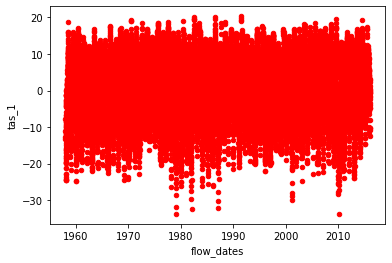

In [22]:
import matplotlib.pyplot as plt
flow.plot(kind='scatter',x='flow_dates',y='tas_1',color='red')
plt.show()

# PCA

In [23]:
from sklearn.preprocessing import StandardScaler
features = ['pr_1','pr_2','pr_3','pr_4','pr_5','pr_6','pr_7','pr_8','pr_9','tas_1','tas_2','tas_3','tas_4','tas_5','tas_6','tas_7','tas_8','tas_9']
# Separating out the features
x = flow.loc[:, features].values
# Separating out the target
y = flow.loc[:,['Flow']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [24]:
flow.to_csv('flow.csv')

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [26]:
finalDf = pd.concat([principalDf, flow[['Flow']]], axis = 1)

In [27]:
finalDf

,principal component 1,principal component 2,Flow
0,-4.838691,2.004137,1.723781
1,-2.465937,2.246986,0.960882
2,1.433831,7.472816,0.001000
3,-1.416034,4.972920,0.001000
4,-4.825952,4.761156,0.316796
...,...,...,...
21169,-0.351785,0.464802,4.281342
21170,-1.068064,-0.276116,3.734578
21171,0.188373,0.069516,1.921873
21172,-1.682423,-0.454463,5.067260


In [28]:
flow_sample = finalDf.sample(n=int(flow.shape[0]*0.6), random_state=1)

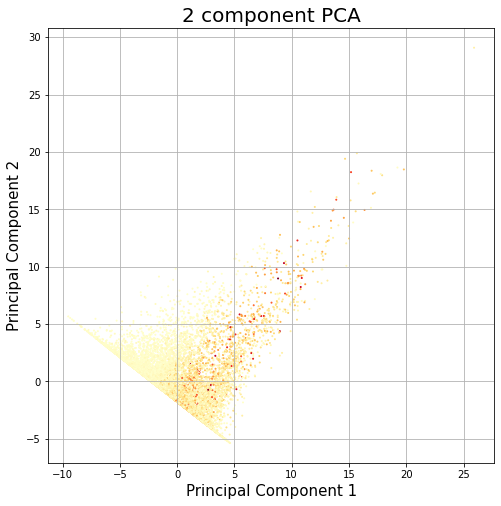

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(flow_sample['principal component 1']
               , flow_sample['principal component 2']
               , cmap = 'YlOrRd',
               c = flow_sample['Flow']
               , s = 1)
ax.grid()

In [30]:
pca.explained_variance_ratio_


array([0.53920936, 0.42600936])

# Correlaciones

In [31]:
pres_var = flow[['pr_1','pr_2','pr_3','pr_4','pr_5','pr_6','pr_7','pr_8','pr_9']]
tas_var = flow[['tas_1','tas_2','tas_3','tas_4','tas_5','tas_6','tas_7','tas_8','tas_9']]

<AxesSubplot:>

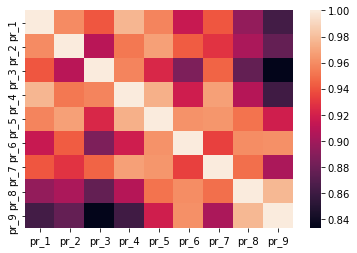

In [32]:
sns.heatmap(pres_var.corr())

<AxesSubplot:>

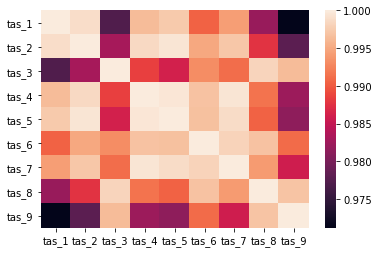

In [33]:
sns.heatmap(tas_var.corr())

# Covarianzas

<AxesSubplot:>

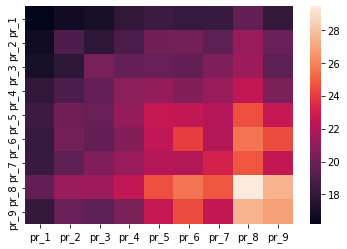

In [34]:
sns.heatmap(pres_var.cov())

<AxesSubplot:>

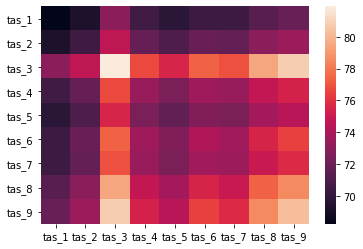

In [35]:
sns.heatmap(tas_var.cov())

In [36]:
tas_var.describe()

,tas_1,tas_2,tas_3,tas_4,tas_5,tas_6,tas_7,tas_8,tas_9
count,21174.000000,21174.000000,21174.000000,21174.000000,21174.000000,21174.000000,21174.000000,21174.000000,21174.000000
mean,-0.045419,0.716284,2.981005,1.491041,1.276537,2.315165,1.892165,2.841272,3.529229
std,8.261173,8.396702,9.050359,8.571408,8.467151,8.613745,8.575183,8.797377,8.959668
min,-33.799999,-32.599998,-33.299999,-33.700001,-32.799999,-32.200001,-33.200001,-32.599998,-30.799999
25%,-5.800000,-5.200000,-3.100000,-4.400000,-4.600000,-3.700000,-4.000000,-3.200000,-2.600000
50%,0.200000,0.900000,3.400000,1.800000,1.500000,2.500000,2.200000,3.100000,3.700000
75%,6.600000,7.600000,10.600000,8.500000,8.200000,9.500000,9.000000,10.200000,11.100000
max,20.299999,21.200001,23.400000,21.700001,21.700001,22.700001,21.799999,23.299999,24.000000


In [37]:
finalDf['fecha'] = flow['flow_dates']

In [38]:
finalDf

,principal component 1,principal component 2,Flow,fecha
0,-4.838691,2.004137,1.723781,1958-01-04
1,-2.465937,2.246986,0.960882,1958-01-05
2,1.433831,7.472816,0.001000,1958-01-06
3,-1.416034,4.972920,0.001000,1958-01-07
4,-4.825952,4.761156,0.316796,1958-01-08
...,...,...,...,...
21169,-0.351785,0.464802,4.281342,2015-12-23
21170,-1.068064,-0.276116,3.734578,2015-12-24
21171,0.188373,0.069516,1.921873,2015-12-25
21172,-1.682423,-0.454463,5.067260,2015-12-26


In [39]:
finalDf.to_csv('datos_topo_PCA.csv')